In [1]:
import typing
from scipy.sparse import spmatrix, csr_matrix
import torch
import torchvision
from scipy.spatial.distance import squareform
import scipy
from numba import jit
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from paradime.affinity import NeighborBased
from paradime.transforms import PerplexityBased, Symmetrize, NormalizeRows, Normalize

In [3]:
mnist = torchvision.datasets.MNIST(
    './data',
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor()
)

In [4]:
testdata = mnist.data.reshape(-1, 28*28) / 255.
testdata = testdata[:500][np.argsort(mnist.targets[:500])]

In [20]:
diss = NeighborBased(
    verbose=True,
    transform=[
        PerplexityBased(30, verbose=True),
        Symmetrize('tsne'),
        # NormalizeRows(),
        Normalize()
    ]
)

In [21]:
foo = diss.compute_affinities(testdata)

2022-06-28 16:57:33.2: Indexing nearest neighbors.
2022-06-28 16:57:33.3: Calculating probabilities.


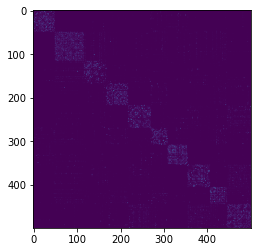

In [22]:
myps = foo.diss.toarray()
plt.imshow(myps)

In [8]:
import openTSNE

In [9]:
otp = openTSNE.affinity.PerplexityBasedNN(testdata, 30)

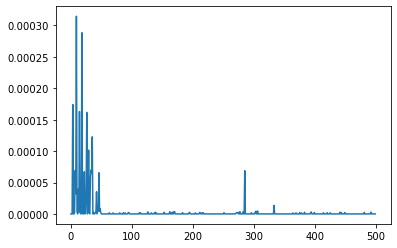

In [23]:
plt.plot(otp.P.toarray()[0])

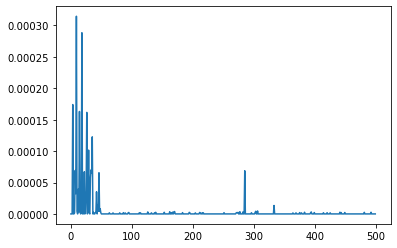

In [24]:
plt.plot(myps[0])

In [70]:
foo.diss.nonzero()[0]

array([  0,   0,   0, ..., 499, 499, 499], dtype=int32)

array([1.08016545, 1.08016545, 1.08016545, ..., 0.77352355, 0.77352355,
       0.77352355])

array([1.08016545, 1.08016545, 1.08016545, ..., 0.77352355, 0.77352355,
       0.77352355])

In [78]:
baz = csr_matrix((
    1/np.repeat(np.array(foo.diss.sum(axis=1)), foo.diss.getnnz(axis=1)),
    foo.diss.nonzero()
)).multiply(foo.diss)

In [83]:
abs(baz.toarray() - (myps / myps.sum(axis=1, keepdims=True))).sum()

1.923691105498379e-14

In [88]:
torch.tensor([[1,2,3], [4,5,6]]) / torch.tensor([[1,2,3], [4,5,6]]).sum(dim=1, keepdim=True)

tensor([[0.1667, 0.3333, 0.5000],
        [0.2667, 0.3333, 0.4000]])

In [89]:
np.array([[1,2,3], [4,5,6]]) / np.array([[1,2,3], [4,5,6]]).sum(axis=1, keepdims=True)

array([[0.16666667, 0.33333333, 0.5       ],
       [0.26666667, 0.33333333, 0.4       ]])